# Analyse Exploratoire des Ventes d'une Chaine de vente d'electroniques 

Nous avons dans le dossier datasets/SalesAnalysis des données de ventes d'une entreprise sur l'année 2019. Vous avez un fichier csv par mois.

Chaque fichier contient les colonnes suivantes:
* OrderID: l'identifiant unique de la commande
* Product: La désignation du produit
* Quantity Ordered: la quantité vendue
* Price each: le prix unitaire
* order date : La date d'achat
* Purchase adress: l'adresse de la boutique de vente

Nous allons analyser ces données pour répondre aux questions suivantes:

* Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?
* Dans quelle ville a-t-on le plus vendu de produits ?
* A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?


Nous allons accompagner nos solutions de visualisations pertinentes afin d'aider le business à améliorer ses chiffres de l'année suivante.



## Importer les données

Essayons de Monter notre google drive

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
data = "Sales_Data/"

In [3]:
os.listdir(data)

['exempleFichierTexte.txt',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

Jetons un coup d'oeil à la data d'un mois, celui de Janvier

In [4]:
janvier_sales = pd.read_csv(data + "Sales_January_2019.csv")

In [5]:
janvier_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
janvier_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


In [7]:
janvier_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [8]:
janvier_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


## Merger la data

In [9]:
files = [fichier for fichier in os.listdir(data) if fichier.endswith('.csv')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [10]:
df = pd.DataFrame()

for file in files:
  data_interm = pd.read_csv(data +'/'+ file)
  df = pd.concat([df, data_interm])


In [11]:
df.shape

(186850, 6)

In [12]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## Nettoyage de la data

In [14]:
df.isnull().sum(axis=0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Affichons un df avec toutes les lignes qui ont au moins une valeur manquante

In [15]:
val_manquantes = df[df.isnull().any(axis=1)]
val_manquantes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


Est-ce que toutes les lignes n'ont que des valeurs manquantes

In [16]:
val_manquantes.isnull().all()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

Supprimer toutes les lignes avec des valeurs manquantes: 

In [17]:
df.shape

(186850, 6)

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(186305, 6)

In [20]:
df.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [21]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


Débarassons-nous des lignes avec des valeurs abérantes

In [22]:
df[df['Order Date'] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [23]:
"1548".isdigit()

True

In [24]:
"11574".isdigit()

True

In [25]:
df.loc[~df['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [26]:
df_clean = df.drop(df.loc[df['Order Date'] == "Order Date", :].index)

In [27]:
df_clean

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [28]:
df_clean.loc[~df_clean['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Changement des Types

In [29]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [30]:
df_clean['Quantity Ordered'] = df_clean['Quantity Ordered'].astype('int')

In [31]:
df_clean['Quantity Ordered'] 

0        2
2        1
3        1
4        1
5        1
        ..
11681    3
11682    1
11683    1
11684    1
11685    1
Name: Quantity Ordered, Length: 182735, dtype: int32

In [32]:
df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'])

In [33]:
df_clean['Price Each'] 

0         11.95
2         99.99
3        600.00
4         11.99
5         11.99
          ...  
11681      2.99
11682    700.00
11683    700.00
11684    379.99
11685     11.95
Name: Price Each, Length: 182735, dtype: float64

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          182735 non-null  object 
 1   Product           182735 non-null  object 
 2   Quantity Ordered  182735 non-null  int32  
 3   Price Each        182735 non-null  float64
 4   Order Date        182735 non-null  object 
 5   Purchase Address  182735 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 9.1+ MB


In [35]:
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

C:\Users\GHASSEN\AppData\Local\Temp\ipykernel_13128\3352047825.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])


In [36]:
df_clean['Order Date']

0       2019-04-19 08:46:00
2       2019-04-07 22:30:00
3       2019-04-12 14:38:00
4       2019-04-12 14:38:00
5       2019-04-30 09:27:00
                ...        
11681   2019-09-17 20:56:00
11682   2019-09-01 16:00:00
11683   2019-09-23 07:39:00
11684   2019-09-19 17:30:00
11685   2019-09-30 00:18:00
Name: Order Date, Length: 182735, dtype: datetime64[ns]

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int32         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.1+ MB


In [38]:
df['Order Date']

0        04/19/19 08:46
2        04/07/19 22:30
3        04/12/19 14:38
4        04/12/19 14:38
5        04/30/19 09:27
              ...      
11681    09/17/19 20:56
11682    09/01/19 16:00
11683    09/23/19 07:39
11684    09/19/19 17:30
11685    09/30/19 00:18
Name: Order Date, Length: 186305, dtype: object

In [39]:
df_clean['Order Date']

0       2019-04-19 08:46:00
2       2019-04-07 22:30:00
3       2019-04-12 14:38:00
4       2019-04-12 14:38:00
5       2019-04-30 09:27:00
                ...        
11681   2019-09-17 20:56:00
11682   2019-09-01 16:00:00
11683   2019-09-23 07:39:00
11684   2019-09-19 17:30:00
11685   2019-09-30 00:18:00
Name: Order Date, Length: 182735, dtype: datetime64[ns]

## Analyse Exploratoire proprement dite

## Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?

In [40]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [41]:
df_clean.index

Index([    0,     2,     3,     4,     5,     6,     7,     8,     9,    10,
       ...
       11676, 11677, 11678, 11679, 11680, 11681, 11682, 11683, 11684, 11685],
      dtype='int64', length=182735)

In [42]:
df_clean  = df_clean.set_index('Order Date')

In [43]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001"
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215"
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001"
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001"
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001"


In [44]:
df_clean.sort_index(inplace=True)

In [45]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001"
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016"
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001"
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001"
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301"


In [46]:
df_clean['Month'] = df_clean.index.month_name()

In [47]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January


In [48]:
df_clean['chiffre_daffaire'] = df_clean['Quantity Ordered'] * df_clean['Price Each']

In [49]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire
Order Date,,,,,,,
2019-05-12 09:40:00,199042,iPhone,1,700.00,"130 Chestnut St, New York City, NY 10001",May,700.00
2019-11-25 07:28:00,292402,Wired Headphones,1,11.99,"327 Jefferson St, San Francisco, CA 94016",November,11.99
2019-02-28 01:04:00,153903,Wired Headphones,1,11.99,"487 Lincoln St, New York City, NY 10001",February,11.99
2019-07-10 10:37:00,229596,AAA Batteries (4-pack),1,2.99,"934 6th St, Portland, OR 97035",July,2.99
2019-04-11 14:58:00,179382,Apple Airpods Headphones,1,150.00,"372 Adams St, San Francisco, CA 94016",April,150.00


In [50]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().sort_values(ascending=False)

Month
December     4557905.42
October      3679254.16
April        3336376.42
November     3149785.09
May          3101881.04
March        2755969.40
July         2587444.91
June         2524464.99
August       2191698.31
February     2158127.48
September    2050361.26
January      1786511.29
Name: chiffre_daffaire, dtype: float64

In [51]:
order = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]

In [52]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order]

Month
January      1786511.29
February     2158127.48
March        2755969.40
April        3336376.42
May          3101881.04
June         2524464.99
July         2587444.91
August       2191698.31
September    2050361.26
October      3679254.16
November     3149785.09
December     4557905.42
Name: chiffre_daffaire, dtype: float64

Text(0.5, 1.0, "Chiffre d'affaire global par mois")

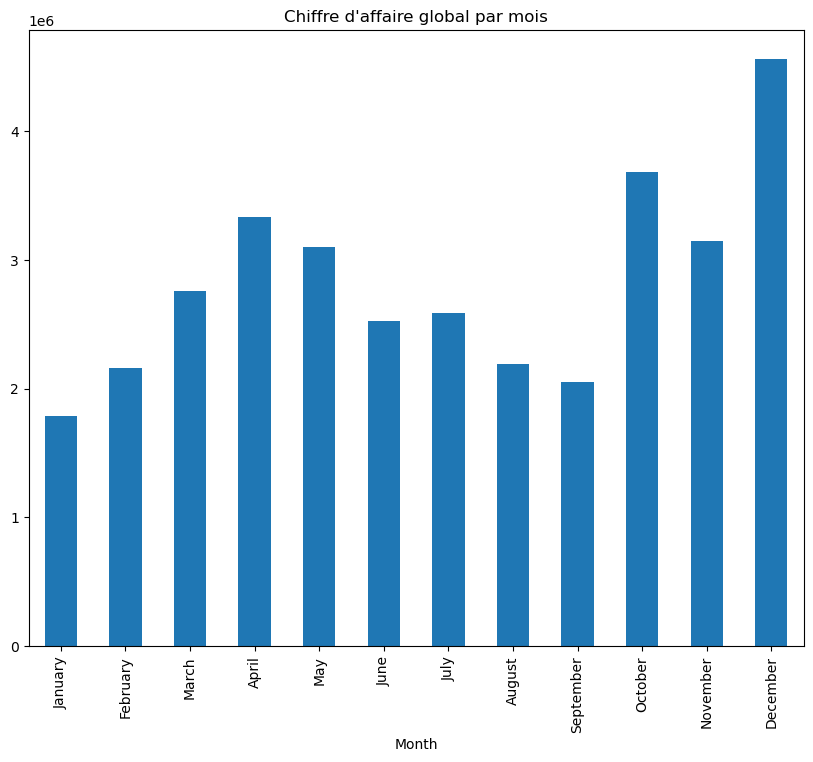

In [53]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().loc[order].plot.bar(figsize=(10, 8))
plt.title("Chiffre d'affaire global par mois")

In [54]:
df_clean.groupby('Month').sum()["chiffre_daffaire"].sort_values(ascending=False).December

4557905.42

Décembre est le mois avec le plus de ventes et le CA est de 4557905.420001525

## Dans quelle ville a-t-on le plus vendu de produits ?

In [55]:
df_clean['Purchase Address'].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [56]:
def get_ville(addresse):
  return addresse.split(',')[1].strip()

In [57]:
"        python        ".strip()

'python'

In [58]:
get_ville("760 Church St, San Francisco, CA 94016")

'San Francisco'

In [59]:
df_clean['ville'] = df_clean['Purchase Address'].apply(get_ville)

In [60]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville
Order Date,,,,,,,,
2019-05-09 11:50:00,197709,AAA Batteries (4-pack),1,2.99,"648 Chestnut St, San Francisco, CA 94016",May,2.99,San Francisco
2019-08-20 23:35:00,236986,Apple Airpods Headphones,1,150.00,"583 West St, Dallas, TX 75001",August,150.00,Dallas
2019-02-12 19:12:00,156936,USB-C Charging Cable,1,11.95,"990 Hill St, San Francisco, CA 94016",February,11.95,San Francisco
2019-11-24 16:49:00,281525,Apple Airpods Headphones,1,150.00,"654 10th St, Boston, MA 02215",November,150.00,Boston
2019-09-05 14:54:00,256530,AA Batteries (4-pack),1,3.84,"415 1st St, San Francisco, CA 94016",September,3.84,San Francisco


In [61]:
df_clean['ville'].unique()

array(['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin'], dtype=object)

In [62]:
df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)

ville
San Francisco    8124120.94
Los Angeles      5354039.93
New York City    4581658.91
Boston           3604080.86
Atlanta          2741642.05
Dallas           2717793.72
Seattle          2693048.60
Portland         2276649.24
Austin           1786745.52
Name: chiffre_daffaire, dtype: float64

<Axes: ylabel='ville'>

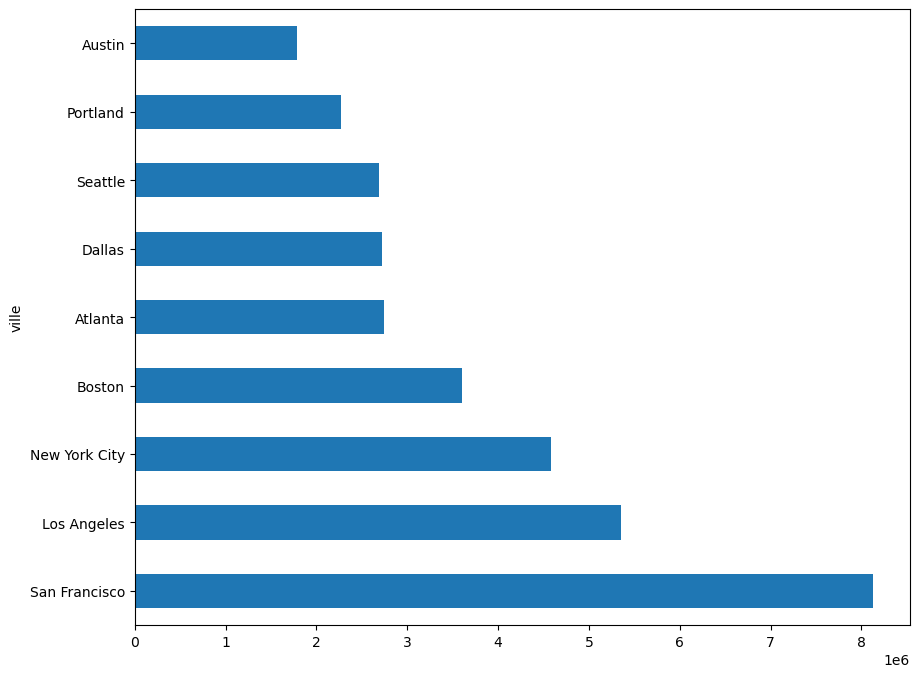

In [63]:
df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False).plot.barh(figsize=(10, 8))

On a fait un meilleur chiffre d'affaire à San Francisco

In [64]:
ca_by_ville = df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)

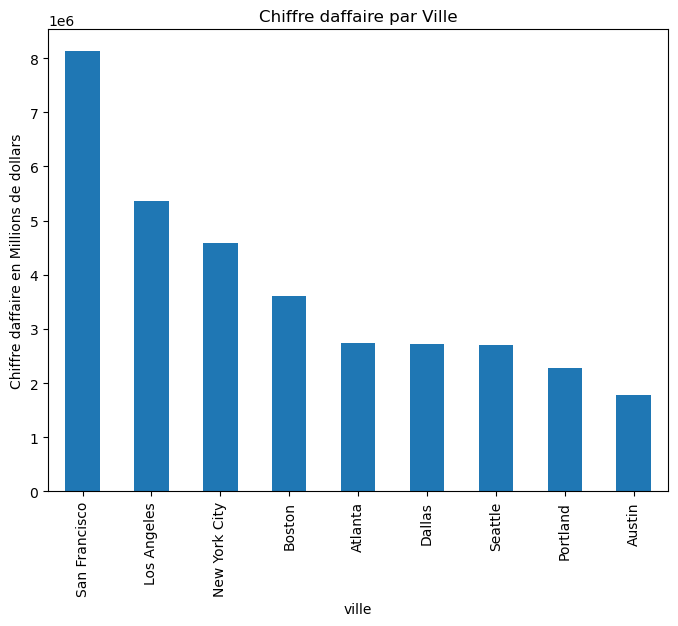

In [65]:
ca_by_ville.plot(kind='bar', figsize=(8, 6))
plt.ylabel('Chiffre daffaire en Millions de dollars')
plt.title('Chiffre daffaire par Ville')
plt.show()

## A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?

A quelle heure on vend le plus ?

In [66]:
df_clean['heure'] = df_clean.index.hour
df_clean['time'] = df_clean.index.time


In [67]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [68]:
df_clean.groupby('heure')['chiffre_daffaire'].sum().sort_values(ascending=False)

heure
19    2370005.59
12    2269676.91
11    2267169.73
20    2242856.37
18    2176209.65
13    2118394.83
17    2086082.23
14    2045085.42
21    2013288.02
10    1907179.29
15    1900151.56
16    1864530.92
9     1612498.90
22    1578173.21
8     1181363.76
23    1161803.96
7      734595.75
0      698694.76
1      447663.86
6      441523.14
2      234191.08
5      224313.72
4      161350.57
3      142976.54
Name: chiffre_daffaire, dtype: float64

In [69]:
ca_par_heure = pd.DataFrame(df_clean.groupby('heure')['chiffre_daffaire'].sum())

In [70]:
ca_par_heure

,chiffre_daffaire
heure,
0,698694.76
1,447663.86
2,234191.08
3,142976.54
4,161350.57
5,224313.72
6,441523.14
7,734595.75
8,1181363.76


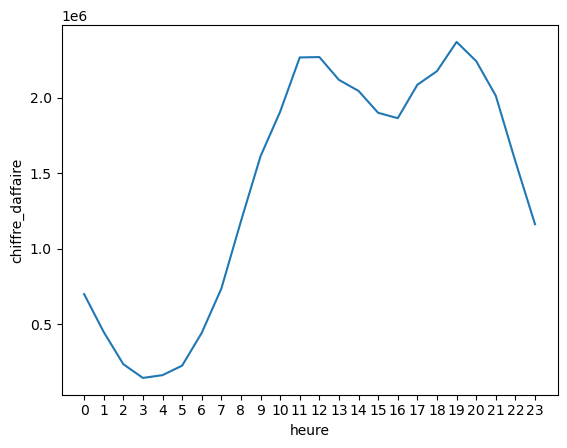

In [71]:
sns.lineplot(data=ca_par_heure['chiffre_daffaire'])
plt.xticks(ticks=range(0, 24))
plt.show()

On devrait afficher la publicité entre 10 et 11 et entre 18 et 19.